<a href="https://colab.research.google.com/github/Megalogic-Point-of-Sales-02/PoS-ML/blob/sales-forecast/Sales_Forecast_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## Read Dataset

In [ ]:
train = pd.read_csv('sales_forecast/train.csv/train.csv', encoding='cp1252')
pd.set_option('display.max_columns', None)
train.head()

C:\Users\Shafa\AppData\Local\Temp\ipykernel_12448\1642932427.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('sales_forecast/train.csv/train.csv', encoding='cp1252')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
print("Jumlah duplikasi data : " + str(train.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
train_sales_date = train[['Date', 'Sales']]
train_sales_date['Date'] = pd.to_datetime(train_sales_date['Date'])
train_sales_date

C:\Users\Shafa\AppData\Local\Temp\ipykernel_12448\3962089946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sales_date['Date'] = pd.to_datetime(train_sales_date['Date'])


,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


<Axes: xlabel='Date'>

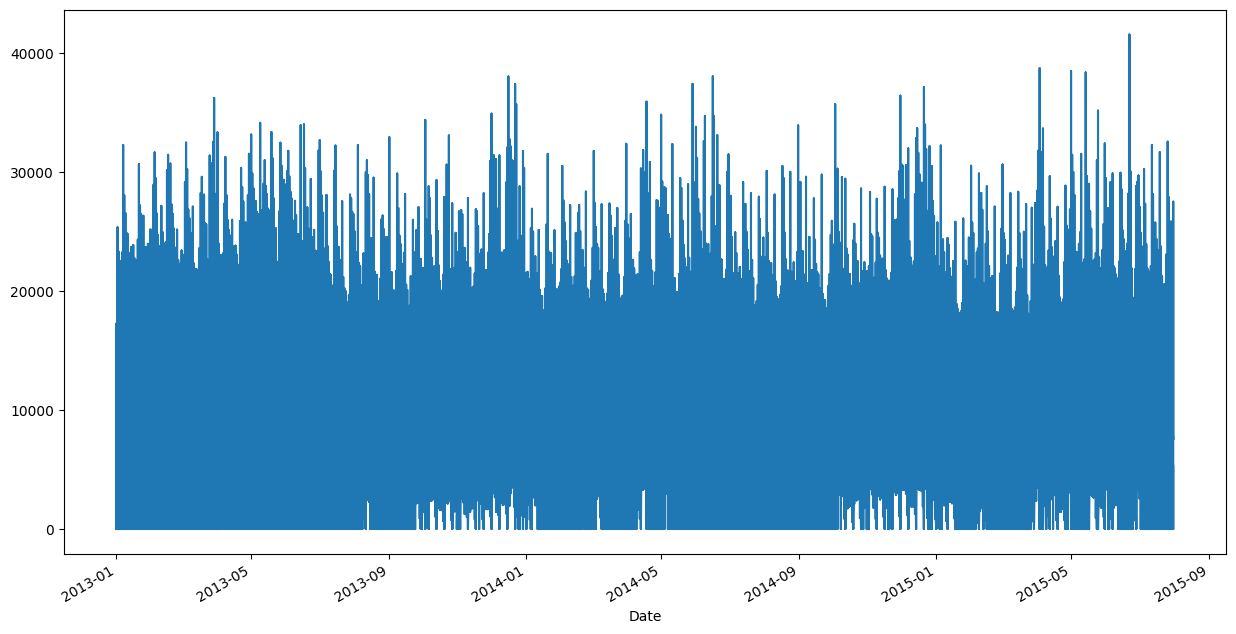

In [ ]:
plt.figure(figsize=(15,8))
train_sales_date.set_index('Date')['Sales'].plot()

## Split Dataset

In [ ]:
train_sales_date.sort_index(inplace=True)
train_sales_date = train_sales_date.sort_values(by='Date')
train_sales_date

,Date,Sales
1017208,2013-01-01,0
1016473,2013-01-01,0
1016472,2013-01-01,0
1016471,2013-01-01,0
1016470,2013-01-01,0
...,...,...
745,2015-07-31,9082
746,2015-07-31,10708
747,2015-07-31,7481
741,2015-07-31,10460


In [ ]:
grouped_train_sales_date = train_sales_date.groupby(['Date'], as_index=False)['Sales'].sum()
grouped_train_sales_date

,Date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
937,2015-07-27,10707292
938,2015-07-28,9115073
939,2015-07-29,8499962
940,2015-07-30,8798854


In [ ]:
normalize = MinMaxScaler()
grouped_train_sales_date['Sales'] = normalize.fit_transform(grouped_train_sales_date[['Sales']])

c:\Users\Shafa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Shafa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Shafa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Shafa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

In [ ]:
sales = grouped_train_sales_date.drop(['Date'], axis = 1)
sales = np.array(sales)

In [ ]:
split_size = int(np.ceil(len(sales) * 0.8))

In [ ]:
train_data = sales[0:int(split_size), :]

x_train = []
y_train = []

for i in range(365, len(train_data)):
    x_train.append(train_data[i-365:i, 0])
    y_train.append(train_data[i, 0])

## Data Preprocessing

In [ ]:
# Reshape Dataset

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Model Building

In [ ]:
model = tf.keras.Sequential([
    # tf.keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, activation="relu", padding='causal', input_shape=[None, 1]),
    # tf.keras.layers.Dense(1),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, activation="relu", padding='causal', input_shape=[None, 1]),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, activation="relu", padding='causal'),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1),
])

c:\Users\Shafa\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=5, verbose=1, shuffle=False)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 48s 401ms/step - loss: 0.0717 - mae: 0.2133
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 31s 394ms/step - loss: 0.0407 - mae: 0.1506
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 32s 405ms/step - loss: 0.0404 - mae: 0.1499
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 32s 408ms/step - loss: 0.0400 - mae: 0.1479
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 550ms/step - loss: 0.0398 - mae: 0.1466
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 30s 379ms/step - loss: 0.0394 - mae: 0.1451
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 31s 402ms/step - loss: 0.0397 - mae: 0.1460
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 26s 325ms/step - loss: 0.0382 - mae: 0.1453
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 31s 395ms/step - loss: 0.0365 - mae: 0.1393
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 36s 456ms/step - loss: 0.0341 - mae: 0.1376
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 32s 412ms/step - loss: 0.0289 - mae: 0.1299
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 29s 365ms/step - loss: 0.0242 - mae: 0.1182
Epoch 13/50
7

In [ ]:
# model.save('sales_forecast.h5')

In [ ]:
# model.save('my_model.keras')

In [ ]:
test_data = sales[split_size - 365: , :]

x_test = []
y_test = sales[split_size:, :]
for i in range(365, len(test_data)):
    x_test.append(test_data[i-365:i, 0])

x_test = np.array(x_test)

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step


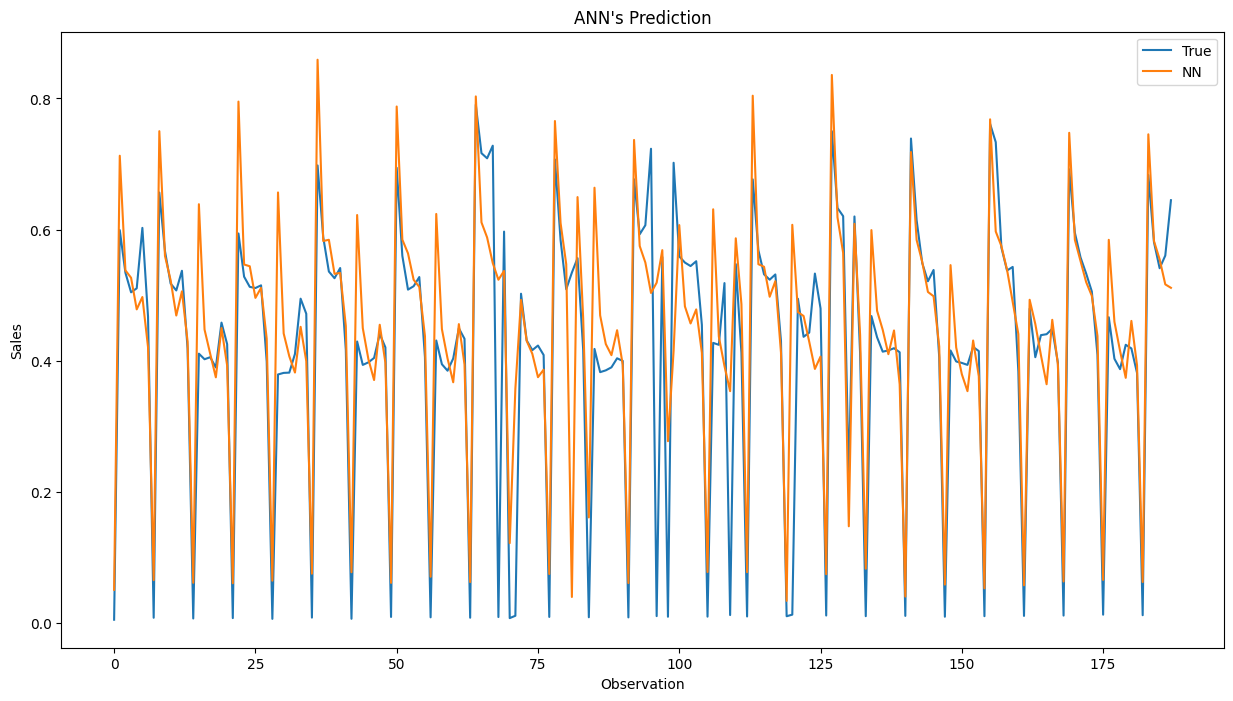

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(predictions, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.legend()
plt.show();

In [ ]:
model_test = model.evaluate(x_test, y_test, batch_size=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0117 - mae: 0.0661
